In [8]:
from plotting_loading import *

/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:71: RuntimeWarning: Mean of empty slice
  anc_s[cond][edge] = np.nanmean(td['s'])
/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:82: RuntimeWarning: Mean of empty slice
  anc_s_clones[cond][edge] = np.nanmean(td['s'])


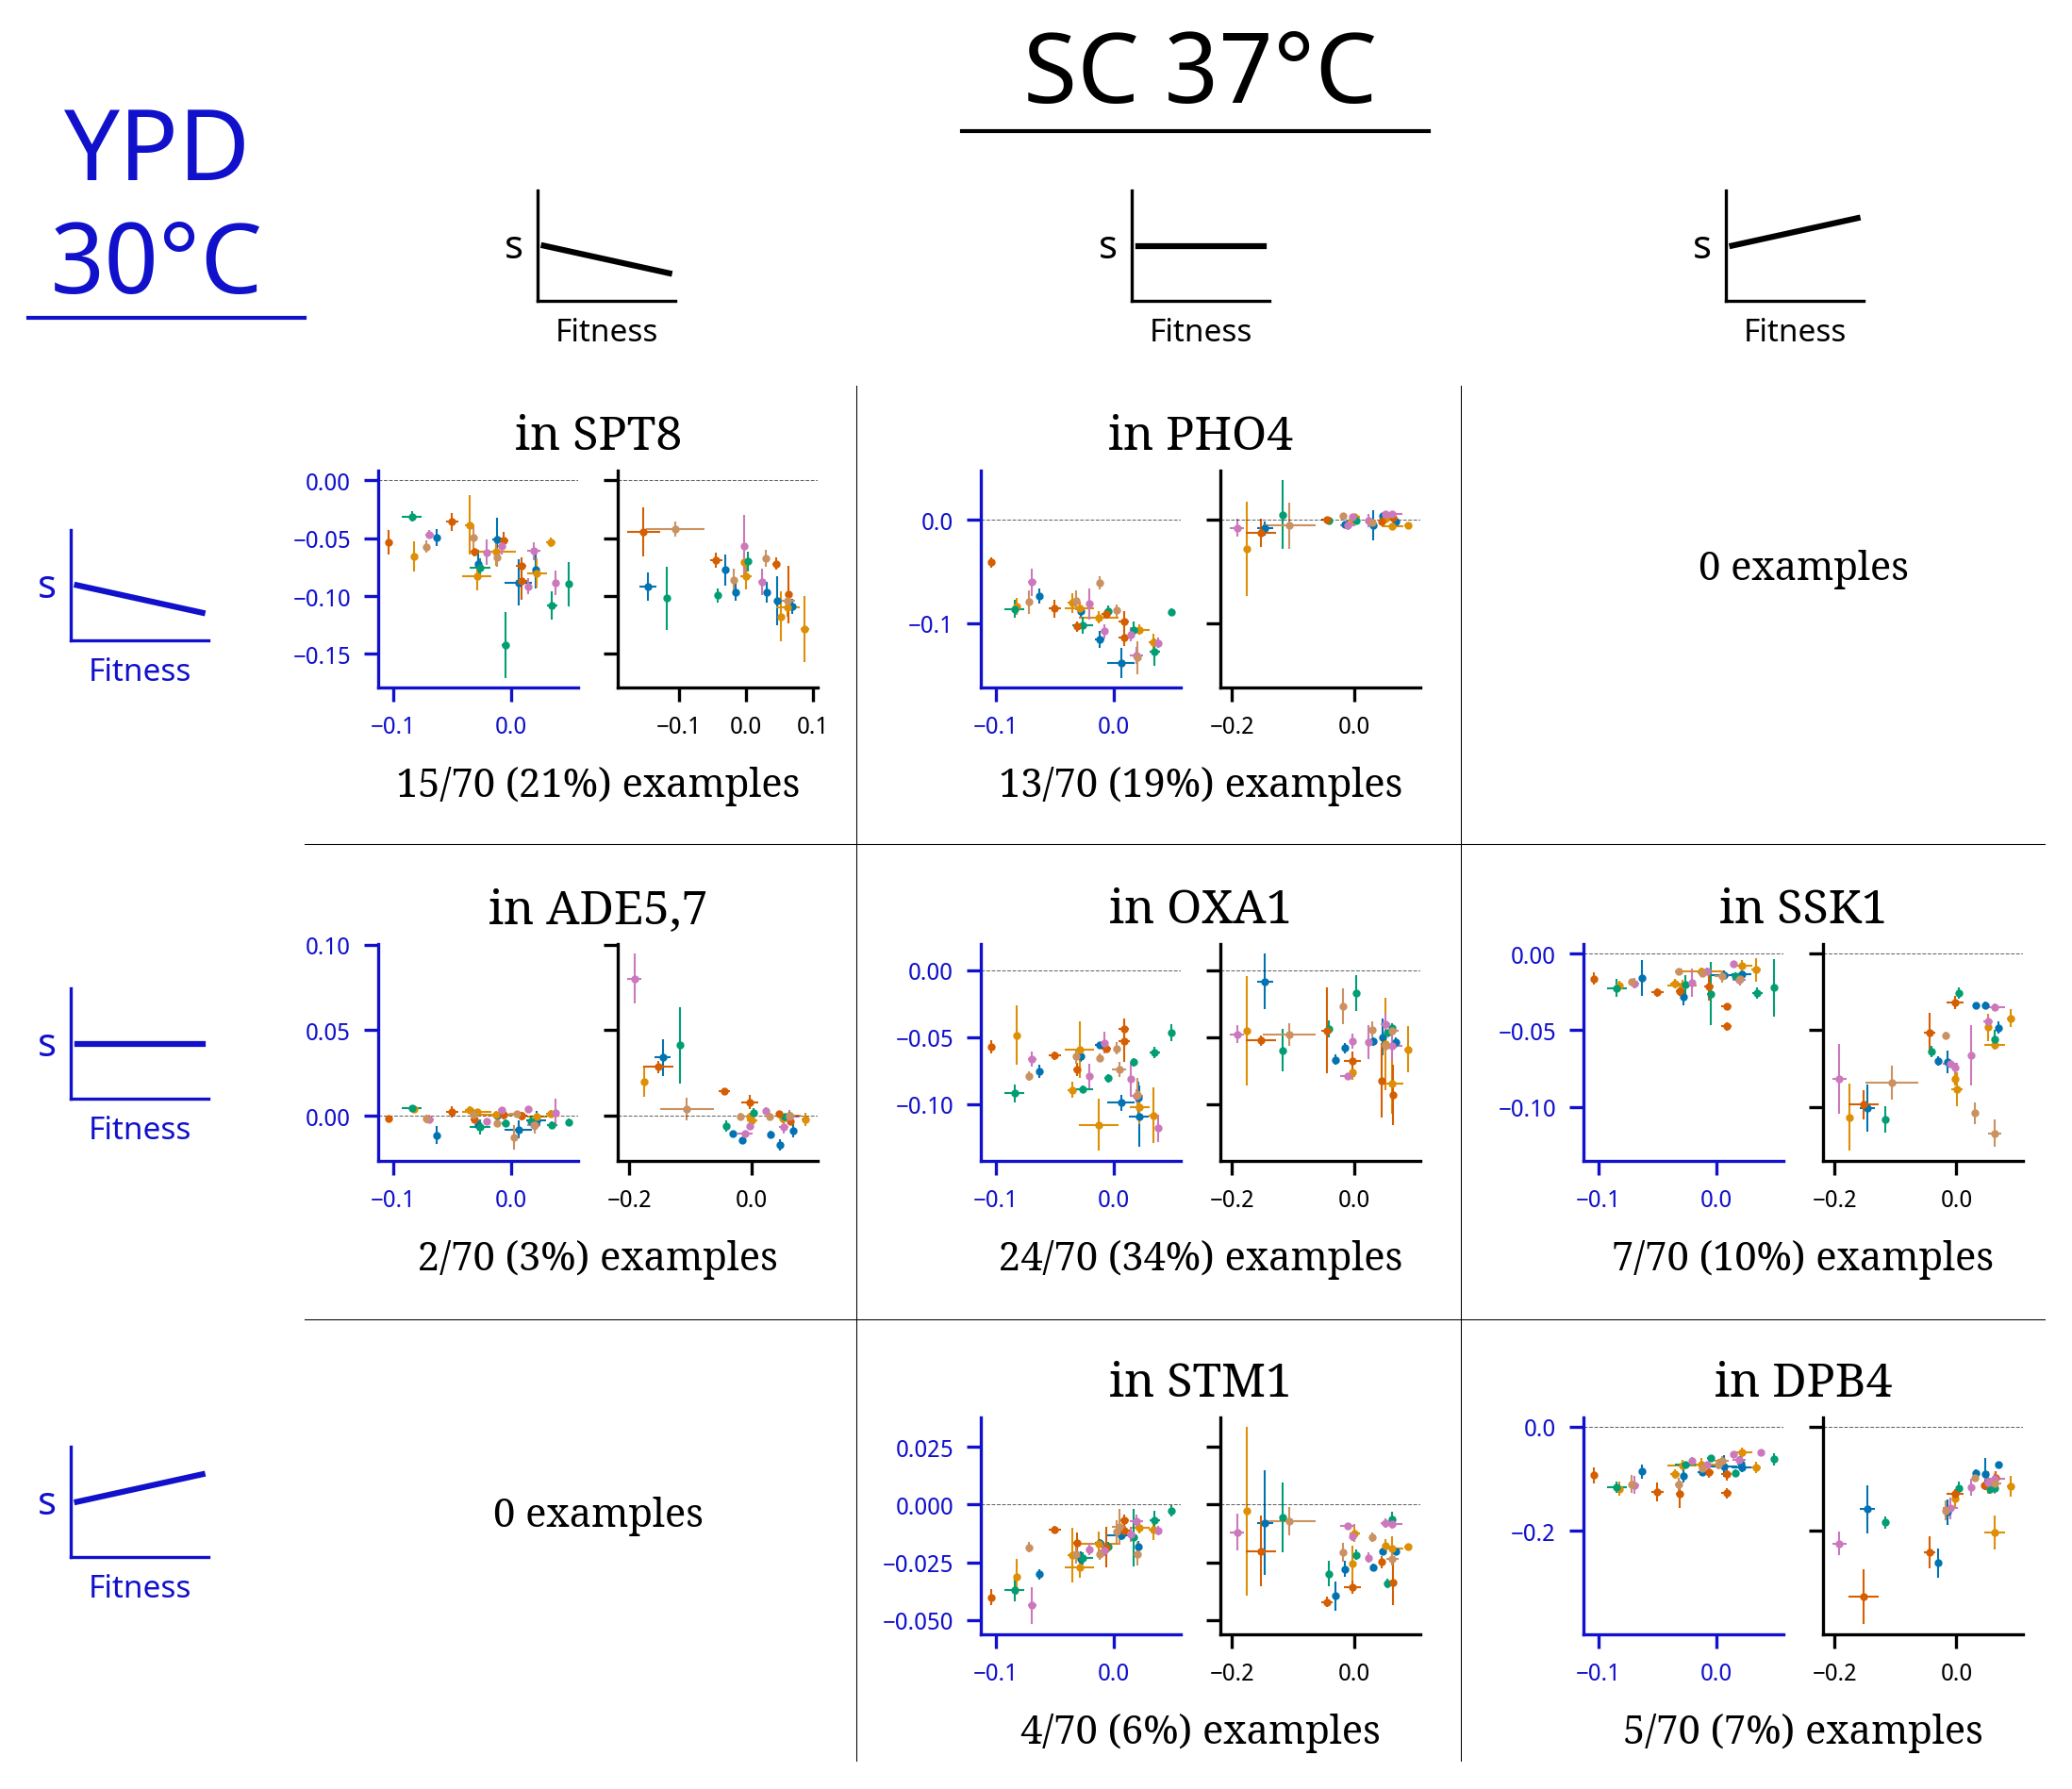

In [9]:
def plot_one(df, sub, cond, edge, axis_color, cbc_cutoff, xvar='Fitness', xerr_var='Fitness_std', lw=0.5):
    td = df[(df['Edge']==edge) & (df['Cond']==cond) & (df['num_cbcs']>=cbc_cutoff)]
    sub.axhline(0, linestyle='dashed', color='k', linewidth=lw/2, alpha=0.6)
    for pop in cond_pops[cond.split('_')[0]]:
        ttd = td[td.Pop==pop].sort_values('Gen')
        ls = ''
        if xvar == 'Gen': 
            ls = '-'
            xerr_var = False
        if xerr_var:
            sub.errorbar(x=ttd[xvar], y=ttd['s'], xerr=ttd[xerr_var], yerr=ttd['stderr'], linestyle=ls, marker='.', markersize=2, linewidth=lw, color=color_map[pop], label=pop)
        else:
            sub.errorbar(x=ttd[xvar], y=ttd['s'], yerr=ttd['stderr'], linestyle=ls, marker='.', markersize=2, linewidth=lw, color=color_map[pop], label=pop)
    #sub.set_ylim([-0.15, 0.1])
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    
def plot_one_byrm(sub, edge, axis_color):
    ttd = byrm_s[(byrm_s['Edge']==edge) & (byrm_s['num_cbcs']>=5)]
    sub.axhline(0, linestyle='dashed', color='k', linewidth=0.25, alpha=0.6)
    sub.errorbar(x=ttd['Fitness'], y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=1, linewidth=0.5, color='k')
    #sub.set_ylim([-0.15, 0.1])
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    
def tiny_plot(sub, yvals, axis_color, xlab='Fitness'):
    sub.plot([0,1], yvals, c=axis_color)
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_ylim([-2,2])
    sub.set_ylabel('s', color=axis_color, rotation='horizontal', fontsize=10, verticalalignment='center', y=0.49, labelpad=6)
    sub.set_xlabel(xlab, color=axis_color, rotation='horizontal', fontsize=8)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    sns.despine(ax=sub)
    
def cross_plot(edge_stats, c1, c2, color1, color2, n1, n2, examples, outname, cbc_cutoff=5, xvar='Fitness', mod='', verbose=False, vtn_df=vtn_s):
    calls = ['-', 'NS', '+']
    fig = pl.figure(figsize=(7.5, 6), dpi=300)
    gs0 = gridspec.GridSpec(11, 22)
    df = edge_stats[(edge_stats.Type=='Experiment') & (edge_stats[c1+mod+'_call'].notnull()) & (edge_stats[c2+mod+'_call'].notnull())]
    for i in range(3):
        for j in range(3):
            tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[i*4:i*4+2,j*8:j*8+6])
            subs = [pl.Subplot(fig, tmp_gs[0])]
            subs.append(pl.Subplot(fig, tmp_gs[1], sharey=subs[0]))
            jnk = [fig.add_subplot(s) for s in subs] 
            pl.subplots_adjust(wspace=0.2)
            call1 = calls[i]
            call2 = calls[j]
            td = df[(df[c1+mod+'_call']==call1) & (df[c2+mod+'_call']==call2)]
            if len(td) > 0:
                if verbose: print(call1, call2, list(td['Gene_Use']))
                plot_one(vtn_df, subs[0], c1, examples[call1+'_'+call2], color1, cbc_cutoff, xvar=xvar)
                if c2 == 'BYxRM':
                    plot_one_byrm(subs[1], examples[call1+'_'+call2], color2)
                else:
                    plot_one(vtn_df, subs[1], c2, examples[call1+'_'+call2], color2, cbc_cutoff, xvar=xvar)
                if verbose: print(len(td[td['Edge']==examples[call1+'_'+call2]]))
                if len(td[td['Edge']==examples[call1+'_'+call2]]) > 0:
                    subs[0].annotate(td[td['Edge']==examples[call1+'_'+call2]]['Gene_Use'].iloc[0], xy=(1.1,1.1), xycoords='axes fraction', fontfamily='Noto serif', fontsize=12, horizontalalignment='center')
                sns.despine(ax=subs[0])
                sns.despine(ax=subs[1])
                subs[0].annotate(f'{len(td)}/{len(df)} ({100*len(td)/len(df):.0f}%) examples', xy=(1.1,-0.5), xycoords='axes fraction', fontfamily='Noto serif', fontsize=10, horizontalalignment='center')
            else:
                subs[0].set_xticks([])
                subs[0].set_yticks([])
                sns.despine(ax=subs[0], left=True, bottom=True)
                subs[1].remove()
                subs[0].annotate('0 examples', xy=(1.1,0.5), xycoords='axes fraction', fontfamily='Noto serif', fontsize=10, horizontalalignment='center')

            #subs[1].set_yticks([])
            if i == 0:
                #subs[0].annotate(calls[j], xy=(1.1,2.2), xycoords='axes fraction', fontsize=25, horizontalalignment='center', color=color2)
                ax = fig.add_axes([0.2+j*0.28, 0.98, 0.065, 0.065])
                tiny_plot(ax, [0,j-1], color2)
                if j == 0:
                    subs[0].annotate(n1.replace(' ', '\n'), xy=(-1.11,2.2), xycoords='axes fraction', fontsize=25, horizontalalignment='center', verticalalignment='center', color=color1)
                if j == 1:
                    subs[0].annotate(n2, xy=(1.1,2.7), xycoords='axes fraction', fontsize=25, horizontalalignment='center', color=color2)
            if j == 0:
                #subs[0].annotate(calls[i], xy=(-1.1,0.6), xycoords='axes fraction', fontsize=25, horizontalalignment='center', verticalalignment='center', color=color1)
                ax = fig.add_axes([-0.02, 0.24+(2-i)*0.27, 0.065, 0.065])
                tiny_plot(ax, [0,i-1], color1)
            pl.setp(subs[1].get_yticklabels(), visible=False)

    shift = -0.05
    fig.add_artist(lines.Line2D([0.09, 0.91], [0.43+shift, 0.43+shift], c='k', linewidth=0.25))
    fig.add_artist(lines.Line2D([0.09, 0.91], [0.71+shift, 0.71+shift], c='k', linewidth=0.25))
    fig.add_artist(lines.Line2D([0.35, 0.35], [0.17+shift, 0.98+shift], c='k', linewidth=0.25))
    fig.add_artist(lines.Line2D([0.635, 0.635], [0.17+shift, 0.98+shift], c='k', linewidth=0.25))
    fig.add_artist(lines.Line2D([0.4, 0.62], [1.08, 1.08], c=color2, linewidth=1))
    fig.add_artist(lines.Line2D([-0.04, 0.09], [0.97, 0.97], c=color1, linewidth=1))
    fig.savefig(outname, background='transparent', bbox_inches='tight', pad_inches=0.1)

calls = ['-', 'NS', '+']
examples = {
    calls[0]+'_'+calls[0]: 'CAATTTCAACGTTGT', # in SPT8
    calls[0]+'_'+calls[1]: 'CAAGTTCGGCGAAAT', # in_PHO4
    calls[0]+'_'+calls[2]: 'TCTTGGAGGTGAATG', # in STE24
    calls[1]+'_'+calls[0]: 'AGATTCATCCCATGG', # in ADE5,7
    calls[1]+'_'+calls[1]: 'ATCGTTGGCATTTGG', # in OXA1
    calls[1]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1
    calls[2]+'_'+calls[1]: 'GTTGAACTGGTTGTT', # in STM1
    calls[2]+'_'+calls[2]: 'AGAACATCATCTACA'  # in DPB4
}

cross_plot(vtn_modeling, 'P1_YPD_30C', 'P3_SC_37C', '#11C', 'k', 'YPD 30°C', 'SC 37°C', examples, '../../Figures/Fitness_mediated_ep.pdf')

In [11]:
calls = ['-', 'NS', '+']
examples = {
    calls[0]+'_'+calls[0]: 'CAAGTTCGGCGAAAT', # in PHO4 *
    calls[0]+'_'+calls[1]: 'CGTCAAGACCTTCTA', # in UME6 *
    calls[0]+'_'+calls[2]: 'ACCACCGGTCCTGCC', # nearby UTP22 *
    calls[1]+'_'+calls[0]: 'GTGTGATTACTAAAT', # nearby RPL16A *
    calls[1]+'_'+calls[1]: 'ATCGTTGGCATTTGG', # in OXA1 *
    calls[1]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1 * 
    calls[2]+'_'+calls[0]: 'AGAACATCATCTACA', # in DPB4 *
    calls[2]+'_'+calls[1]: 'CAAGGATCCCCGTAG', # in BUL1 *
    calls[2]+'_'+calls[2]: 'AGTGTATGATAATAT', # nearby KRI1 *
}
cross_plot(vtn_modeling, 'P1_YPD_30C', 'BYxRM', '#11C', 'k', 'YPD 30°C', 'BYxRM', examples, '../../Figures/supp_figs/Fitness_mediated_YPD_v_BYRM.pdf')
pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'AGTTTATAAAAAATT', # nearby CCW12
    calls[0]+'_'+calls[1]: None, 
    calls[0]+'_'+calls[2]: 'ACCACCGGTCCTGCC', # nearby UTP22
    calls[1]+'_'+calls[0]: 'GTCACCGGCACTAAC', # in SIR4
    calls[1]+'_'+calls[1]: 'CAAGGATCCCCGTAG', # in BUL1
    calls[1]+'_'+calls[2]: 'CTACTTACAACGGAA', # in KAP123
    calls[2]+'_'+calls[0]: 'TGGAGTCTTTGTTGA', # in NOT3
    calls[2]+'_'+calls[1]: 'CTCGCTAATACTCCT', # in RGS2
    calls[2]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1
}
cross_plot(vtn_modeling, 'P3_SC_37C', 'BYxRM', '#C11', 'k', 'SC 37°C', 'BYxRM', examples, '../../Figures/supp_figs/Fitness_mediated_SC37C_v_BYRM.pdf')
pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'CCAACACAGGCTTCG', # in NOP16
    calls[0]+'_'+calls[1]: 'GGTGGAAGTAGCAGT', # in PHO4
    calls[0]+'_'+calls[2]: 'TCTTGGAGGTGAATG', # in STE24
    calls[1]+'_'+calls[0]: 'ATTATCAAGTGCCAG', # in CPR6
    calls[1]+'_'+calls[1]: 'GAACTCAGGTTCCAT', # in MME1
    calls[1]+'_'+calls[2]: 'CATTTATGGCTATCT', # in VAM6
    calls[2]+'_'+calls[1]: 'GTTGAACTGGTTGTT', # in STM1
    calls[2]+'_'+calls[2]: 'TGGAGTCTTTGTTGA'  # in NOT3
}

cross_plot(vtn_modeling, 'P1_YPD_30C', 'P1_SC_37C', '#11C', 'k', 'YPD 30°C', 'Evo. YPD 30°C, in SC 37°C', examples, '../../Figures/supp_figs/Fitness_mediated_YPD_v_P1SC37C.pdf')
pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'CCAACACAGGCTTCG', # in NOP16
    calls[0]+'_'+calls[1]: 'AGATTCATCCCATGG', # in ADE5,7
    calls[0]+'_'+calls[2]: 'GTTTGTTTTGGGAAA', # nearby VMA7
    calls[1]+'_'+calls[0]: 'CTAAGCAGTCTTCTC', # in LAT1
    calls[1]+'_'+calls[1]: 'AGAAGACGACGATGA', # in OCA1
    calls[1]+'_'+calls[2]: 'CATATGCATTCCTTG', # in MAC1
    calls[2]+'_'+calls[0]:  None,
    calls[2]+'_'+calls[1]: 'CCAGGATGTACCGCC', # in SSK1
    calls[2]+'_'+calls[2]: 'TGGAGTCTTTGTTGA'  # in NOT3
}
cross_plot(vtn_modeling, 'P3_SC_37C','P1_SC_37C',  '#C11', 'k', 'SC 37°C', 'Evo. YPD 30°C, in SC 37°C', examples, '../../Figures/supp_figs/Fitness_mediated_P1SC37C_v_SC37.pdf')
pl.close('all')


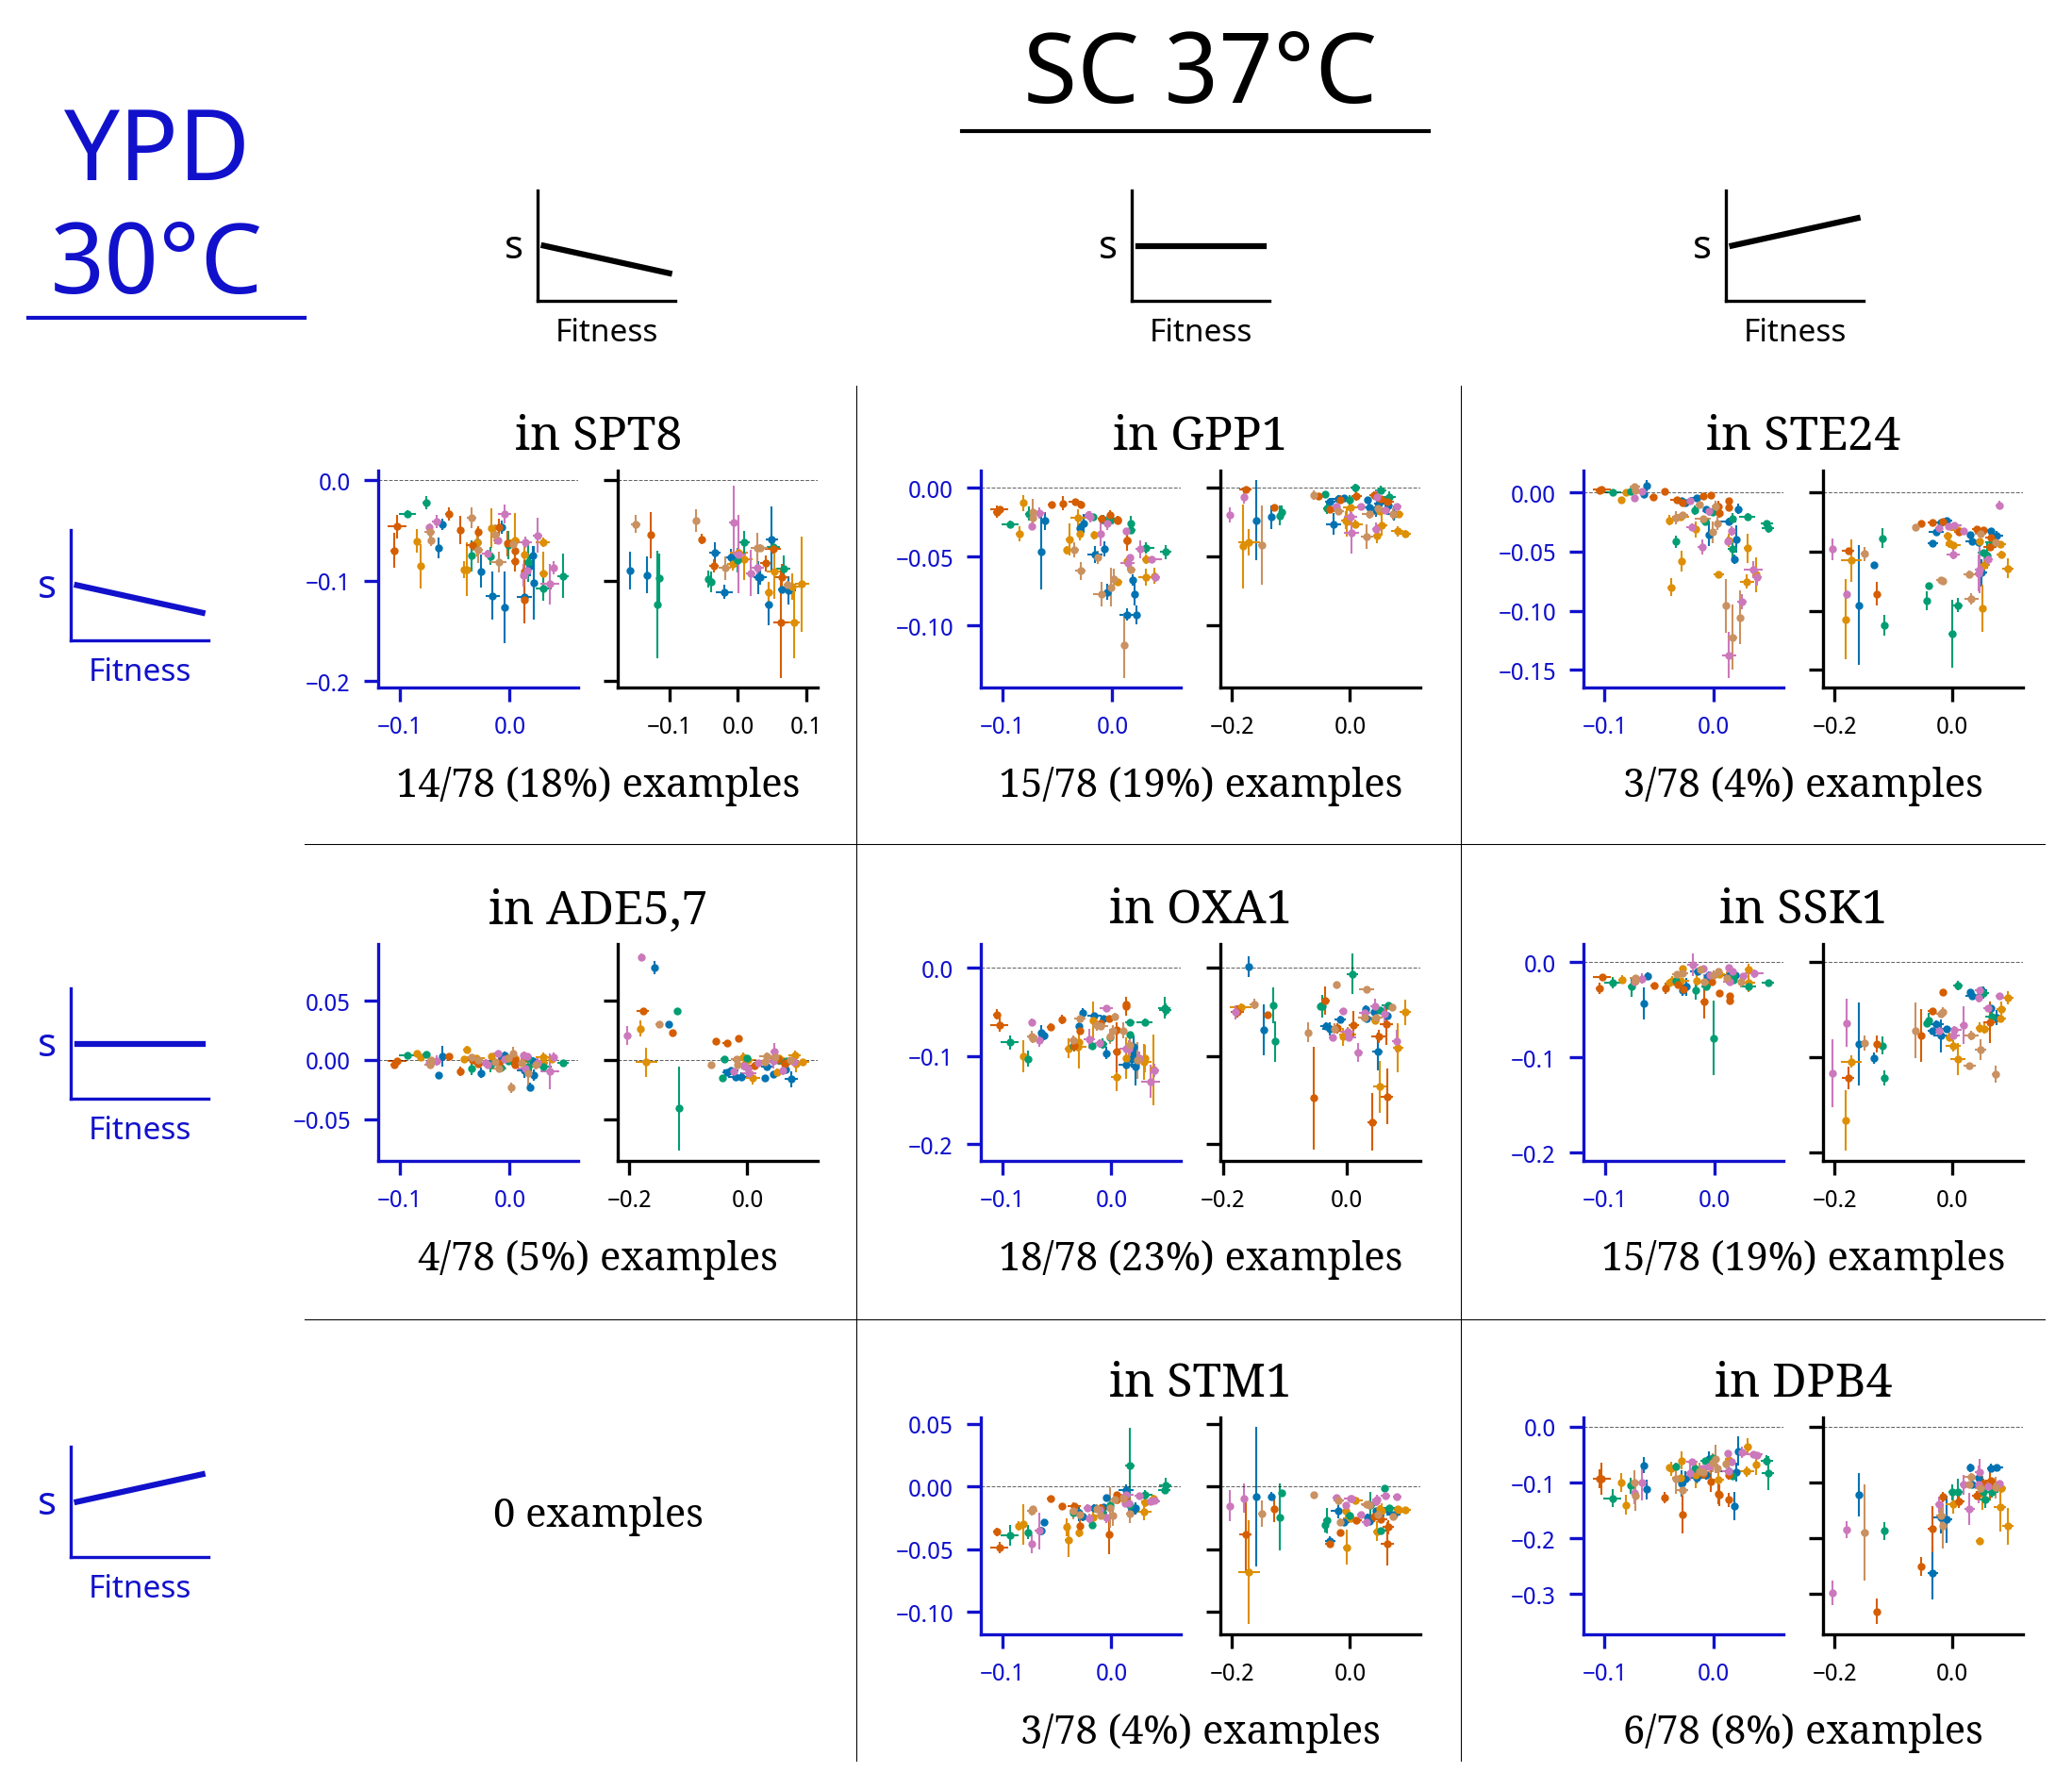

In [12]:
calls = ['-', 'NS', '+']
examples = {
    calls[0]+'_'+calls[0]: 'CAATTTCAACGTTGT', # in SPT8
    calls[0]+'_'+calls[1]: 'ATAGAGCGGCGTTGA', # in GPP1
    calls[0]+'_'+calls[2]: 'TCTTGGAGGTGAATG', # in STE24
    calls[1]+'_'+calls[0]: 'AGATTCATCCCATGG', # in ADE5,7
    calls[1]+'_'+calls[1]: 'ATCGTTGGCATTTGG', # in OXA1
    calls[1]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1
    calls[2]+'_'+calls[1]: 'GTTGAACTGGTTGTT', # in STM1
    calls[2]+'_'+calls[2]: 'AGAACATCATCTACA'  # in DPB4
}

cross_plot(vtn_modeling_clones, 'P1_YPD_30C', 'P3_SC_37C', '#11C', 'k', 'YPD 30°C', 'SC 37°C', 
           examples, '../../Figures/supp_figs_clones/Fitness_mediated_ep_clones.pdf', cbc_cutoff=3, vtn_df=vtn_s_clones)

In [13]:
calls = ['-', 'NS', '+']
examples = {
    calls[0]+'_'+calls[0]: 'CAAGTTCGGCGAAAT', # in PHO4 *
    calls[0]+'_'+calls[1]: 'CGTCAAGACCTTCTA', # in UME6 *
    calls[0]+'_'+calls[2]: 'ACCACCGGTCCTGCC', # nearby UTP22 *
    calls[1]+'_'+calls[0]: 'GTGTGATTACTAAAT', # nearby RPL16A *
    calls[1]+'_'+calls[1]: 'ATCGTTGGCATTTGG', # in OXA1 *
    calls[1]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1 * 
    calls[2]+'_'+calls[0]: 'AGAACATCATCTACA', # in DPB4 *
    calls[2]+'_'+calls[1]: 'CAAGGATCCCCGTAG', # in BUL1 *
    calls[2]+'_'+calls[2]: 'AGTGTATGATAATAT', # nearby KRI1 *
}
cross_plot(vtn_modeling_clones, 'P1_YPD_30C', 'BYxRM', '#11C', 'k', 'YPD 30°C', 'BYxRM', examples, '../../Figures/supp_figs_clones/Fitness_mediated_YPD_v_BYRM_clones.pdf', cbc_cutoff=3, vtn_df=vtn_s_clones)
pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'AGTTTATAAAAAATT', # nearby CCW12
    calls[0]+'_'+calls[1]: None, 
    calls[0]+'_'+calls[2]: None,
    calls[1]+'_'+calls[0]: 'TAGACGGACATCTTC', # in RPL31B
    calls[1]+'_'+calls[1]: 'CAAGGATCCCCGTAG', # in BUL1
    calls[1]+'_'+calls[2]: 'CTACTTACAACGGAA', # in KAP123
    calls[2]+'_'+calls[0]: 'TGGAGTCTTTGTTGA', # in NOT3
    calls[2]+'_'+calls[1]: 'CTCGCTAATACTCCT', # in RGS2
    calls[2]+'_'+calls[2]: 'CCAGGATGTACCGCC', # in SSK1
}
cross_plot(vtn_modeling_clones, 'P3_SC_37C', 'BYxRM', '#C11', 'k', 'SC 37°C', 'BYxRM', examples, '../../Figures/supp_figs_clones/Fitness_mediated_SC37C_v_BYRM_clones.pdf', cbc_cutoff=3, vtn_df=vtn_s_clones)
pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'CCAACACAGGCTTCG', # in NOP16
    calls[0]+'_'+calls[1]: 'GGTGGAAGTAGCAGT', # in PHO4
    calls[0]+'_'+calls[2]: 'TCTTGGAGGTGAATG', # in STE24
    calls[1]+'_'+calls[0]: 'ATTATCAAGTGCCAG', # in CPR6
    calls[1]+'_'+calls[1]: 'AGATTCATCCCATGG', # in ADE5,7
    calls[1]+'_'+calls[2]: 'GTCACCGGCACTAAC', # in SIR4
    calls[2]+'_'+calls[1]: 'GTTGAACTGGTTGTT', # in STM1
    calls[2]+'_'+calls[2]: 'CAAGGATCCCCGTAG'  # in BUL1
}

cross_plot(vtn_modeling_clones, 'P1_YPD_30C', 'P1_SC_37C', '#11C', 'k', 'YPD 30°C', 'Evo. YPD 30°C, in SC 37°C', examples, '../../Figures/supp_figs_clones/Fitness_mediated_YPD_v_P1SC37C_clones.pdf', cbc_cutoff=3, vtn_df=vtn_s_clones)
#pl.close('all')

examples = {
    calls[0]+'_'+calls[0]: 'CCAACACAGGCTTCG', # in NOP16
    calls[0]+'_'+calls[1]: 'AGATTCATCCCATGG', # in ADE5,7
    calls[0]+'_'+calls[2]: 'TAACCTCGCGCTGAG', # nearby NCP1
    calls[1]+'_'+calls[0]: 'TAGACGGACATCTTC', # in RPL31B
    calls[1]+'_'+calls[1]: 'CTAAGCAGTCTTCTC', # in LAT1
    calls[1]+'_'+calls[2]: 'CATATGCATTCCTTG', # in MAC1
    calls[2]+'_'+calls[0]: 'GAACTCAGGTTCCAT', # in MME1
    calls[2]+'_'+calls[1]: 'CCAGGATGTACCGCC', # in SSK1
    calls[2]+'_'+calls[2]: 'GTCACCGGCACTAAC'  # in SIR4
}
cross_plot(vtn_modeling_clones, 'P3_SC_37C','P1_SC_37C',  '#C11', 'k', 'SC 37°C', 'Evo. YPD 30°C, in SC 37°C', examples, '../../Figures/supp_figs_clones/Fitness_mediated_P1SC37C_v_SC37_clones.pdf', cbc_cutoff=3, vtn_df=vtn_s_clones)
pl.close('all')


In [14]:
for cond in conditions:
    print(cond)
    c = 0
    for j, row in vtn_modeling.iterrows():
        if row[cond+'_call'] in ['+', '-']:
            if row[cond+'_bh_p']<0.05:
                c += 1
            else:
                print(row[cond+'_call'], row[cond+'_p'], row[cond+'_slope'], row['Gene_Use'])
        if row[cond+'_bh_p']<0.05 and row[cond+'_call'] not in ['+', '-']:
            print('New', row[cond+'_call'], row[cond+'_p'], row[cond+'_slope'], row['Gene_Use'])
    print(cond, c)
                
#vtn_modeling[['P1_YPD_30C_call', 'P1_YPD_30C_sig', 'P3_SC_37C_call', 'P3_SC_37C_sig', 'P1_SC_37C_call', 'P1_SC_37C_sig']]

P1_YPD_30C
- 0.046062954831768116 -0.05951570236489068 in OCA1
- 0.028148700446166682 -0.3317520594593607 in SLX5
- 0.03249254274573316 -0.18764415358966466 in RPL35B
- 0.04486836111721025 -0.08524286169145888 in FUN30
- 0.03292619251926837 -0.12311898248602128 in RPL31B
- 0.037138971665310966 -0.1274100807105247 in RPL31B
- 0.043742209253480144 -0.17607963947185007 in PDE2
- 0.034675247162423734 -0.2924052465526963 nearby YLR264C-A
- 0.036983459465155716 -0.16110048740414246 in RPL16A
- 0.04286516562359656 -0.11177658576550313 in YOR139C
P1_YPD_30C 34
P3_SC_37C
+ 0.027934354782750862 0.43282693613994216 in COG8
New NS 0.001894183777109684 0.048687329363003004 in PHO4
- 0.04557499329214553 -0.1397652779219039 in OCA1
New NS 0.00027999066679160173 -0.02702973288545807 nearby TDA11
New NS 0.0010434901957009856 0.02364746078154101 nearby FIT2
New NS 0.00912988694943911 0.009517577503994032 nearby COA6
- 0.025731278538912453 -0.32341740051599704 in UBP3
New NS 0.002056864974802534 0.045917